# **Sistema de Recomendación de Netflix**


En este proyecto, construiremos un sistema sencillo de recomendación de películas utilizando el conjunto de datos del premio Netflix. Cargaremos y preprocesaremos los datos, realizaremos un análisis exploratorio y finalmente construiremos un modelo básico de filtrado colaborativo.


## Importando Librerias

In [36]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")

## Cargando los Datos
Comenzaremos cargando el conjunto de datos e inspeccionando su estructura.


In [37]:
df1 = pd.read_csv('netflix_tv_shows_detailed_up_to_2025.csv')
df2 = pd.read_csv('netflix_movies_detailed_up_to_2025.csv')

df1['type'] = 'TV Show'
df2['type'] = 'Movie'

netflix_dataset_2025 = pd.concat([df1, df2], ignore_index=True)

netflix_dataset=pd.read_csv('netflix_dataset.csv')
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [38]:
netflix_dataset.info()
netflix_dataset_2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7281 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       32000 non-null  int64  
 1   type     

In [39]:
#Identify the unique values
dict = {}
for i in list(netflix_dataset.columns):
    dict[i] = netflix_dataset[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["unique count"]).transpose())

dict = {}
for i in list(netflix_dataset_2025.columns):
    dict[i] = netflix_dataset_2025[i].value_counts().shape[0]
    
print(pd.DataFrame(dict,index = ["unique count"]).transpose())

              unique count
show_id               7787
type                     2
title                 7787
director              4049
cast                  6831
country                681
date_added            1565
release_year            73
rating                  14
duration               216
listed_in              492
description           7769
              unique count
show_id              31594
type                     2
title                30639
director             13011
cast                 30230
country               1745
date_added            5504
release_year            16
rating                2728
duration                 1
genres                3895
language                83
description          28636
popularity           24159
vote_count            2902
vote_average          2728
budget                 958
revenue               5327


show_id does represents the primary key of the datasets.
There are only two types of Netflix content type, where as others are distributed in wide range will need futher analysis with graphs.

In [40]:
# Missing values
print('Table of missing values: ')
print(netflix_dataset.isnull().sum())

print('Table of missing values: ')
print(netflix_dataset_2025.isnull().sum())

Table of missing values: 
show_id            0
type               0
title              0
director        2389
cast             718
country          506
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
Table of missing values: 
show_id             0
type                0
title               0
director        11097
cast             1361
country          2263
date_added          0
release_year        0
rating              0
duration        16000
genres           1081
language            0
description      3338
popularity          0
vote_count          0
vote_average        0
budget          16000
revenue         16000
dtype: int64


## Exploratory Data Analysis
Let's explore the dataset to understand user and movie distributions, sparsity, etc.


## Analysis of Movies vs TV Shows

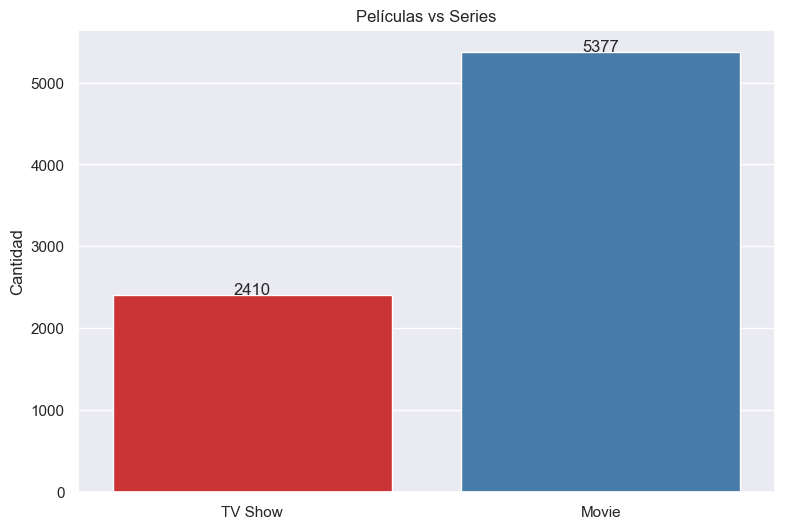

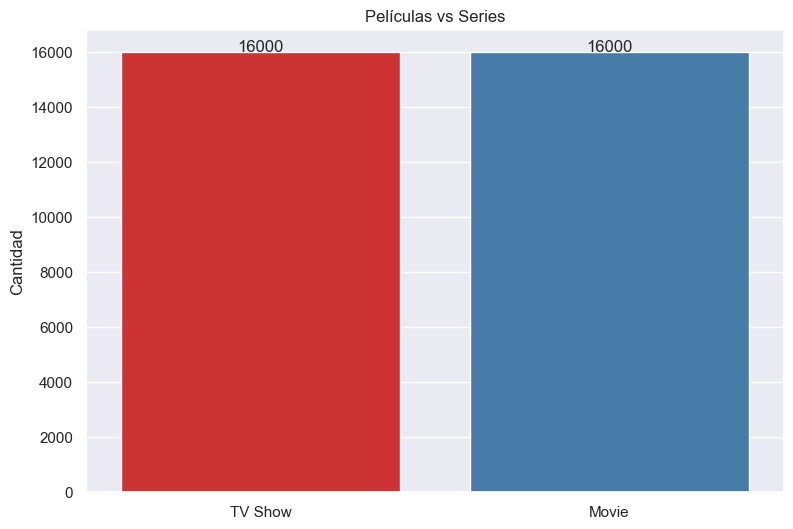

In [41]:
netflix_shows=netflix_dataset[netflix_dataset['type']=='TV Show']
netflix_movies=netflix_dataset[netflix_dataset['type']=='Movie']

plt.figure(figsize=(9,6))
sns.countplot(data=netflix_dataset, x='type', palette="Set1")
plt.title('Películas vs Series')
plt.xlabel('')
plt.ylabel('Cantidad')
for p in plt.gca().patches:
    plt.text(p.get_x()+p.get_width()/2, p.get_height()+5, int(p.get_height()), ha='center')
plt.show()

netflix_shows_25=netflix_dataset_2025[netflix_dataset_2025['type']=='TV Show']
netflix_movies_25=netflix_dataset_2025[netflix_dataset_2025['type']=='Movie']

plt.figure(figsize=(9,6))
sns.countplot(data=netflix_dataset_2025, x='type', palette="Set1")
plt.title('Películas vs Series')
plt.xlabel('')
plt.ylabel('Cantidad')
for p in plt.gca().patches:
    plt.text(p.get_x()+p.get_width()/2, p.get_height()+5, int(p.get_height()), ha='center')
plt.show()

It is evident that there are more Movies on Netflix than TV shows.

## **In which month, a producer can releases its content? (Month when least amount of content is added)**

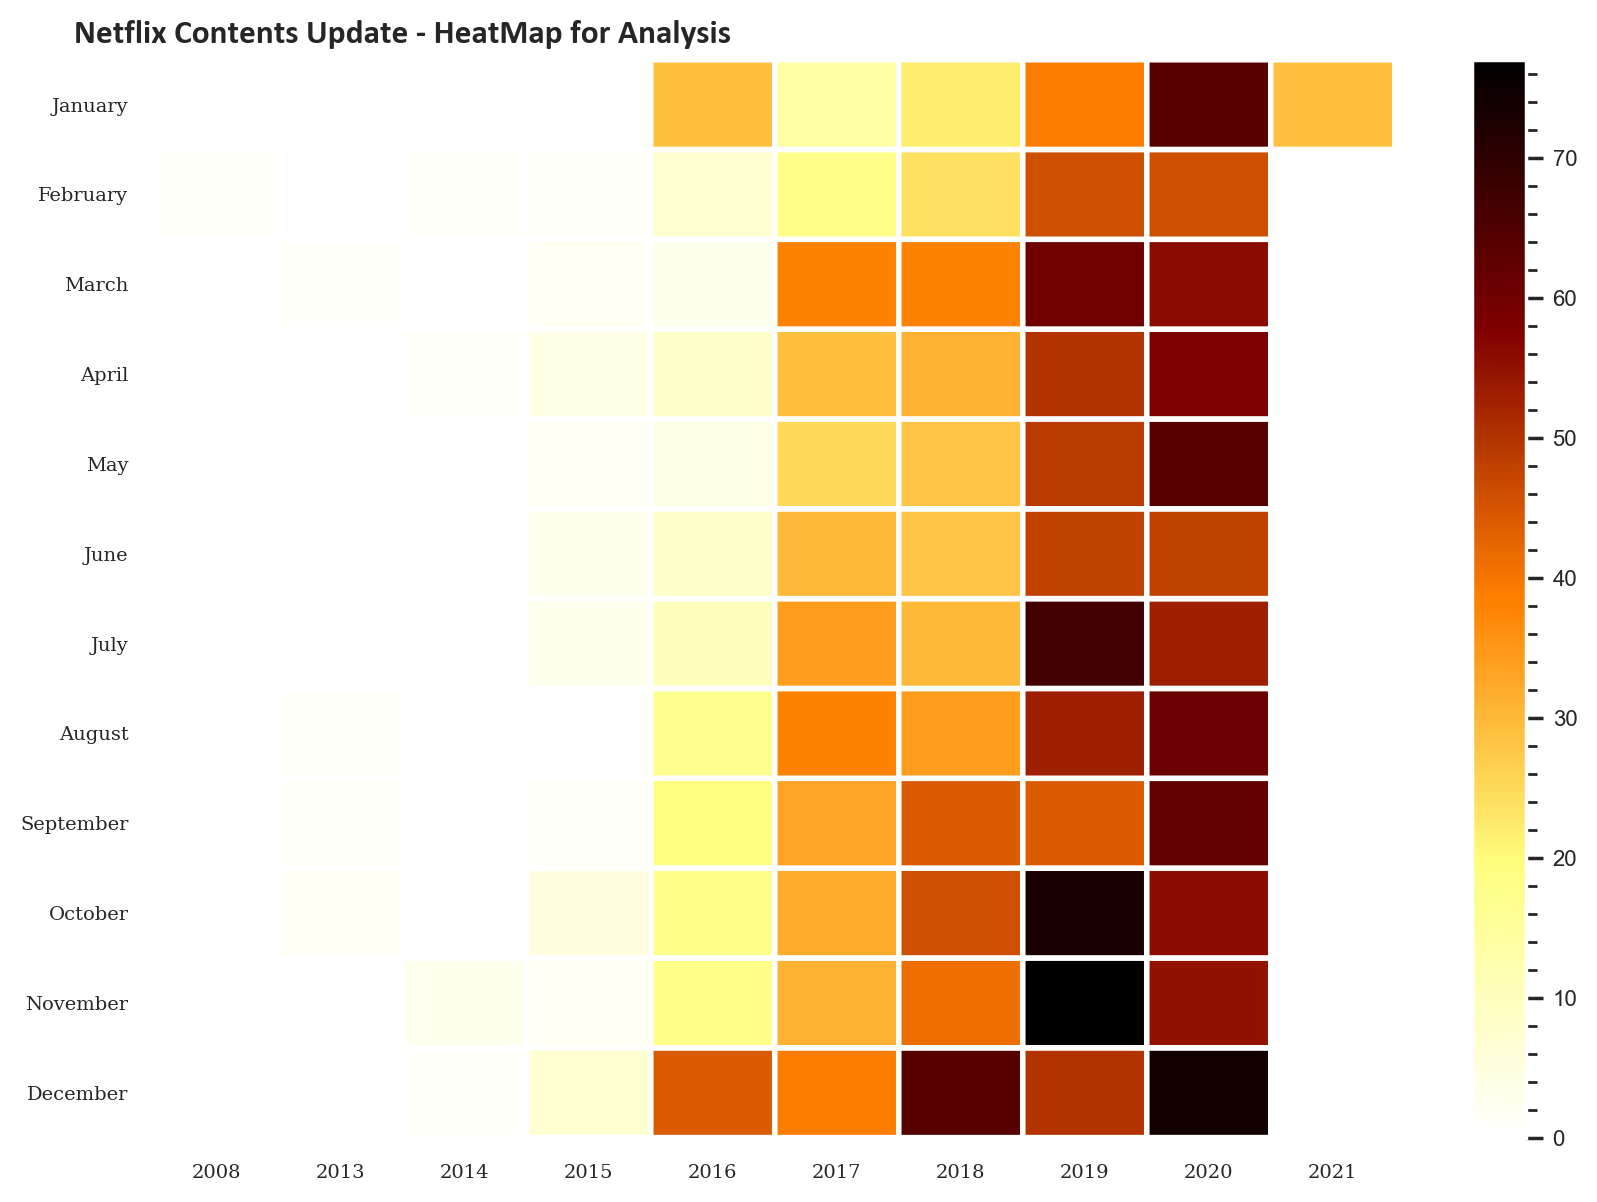

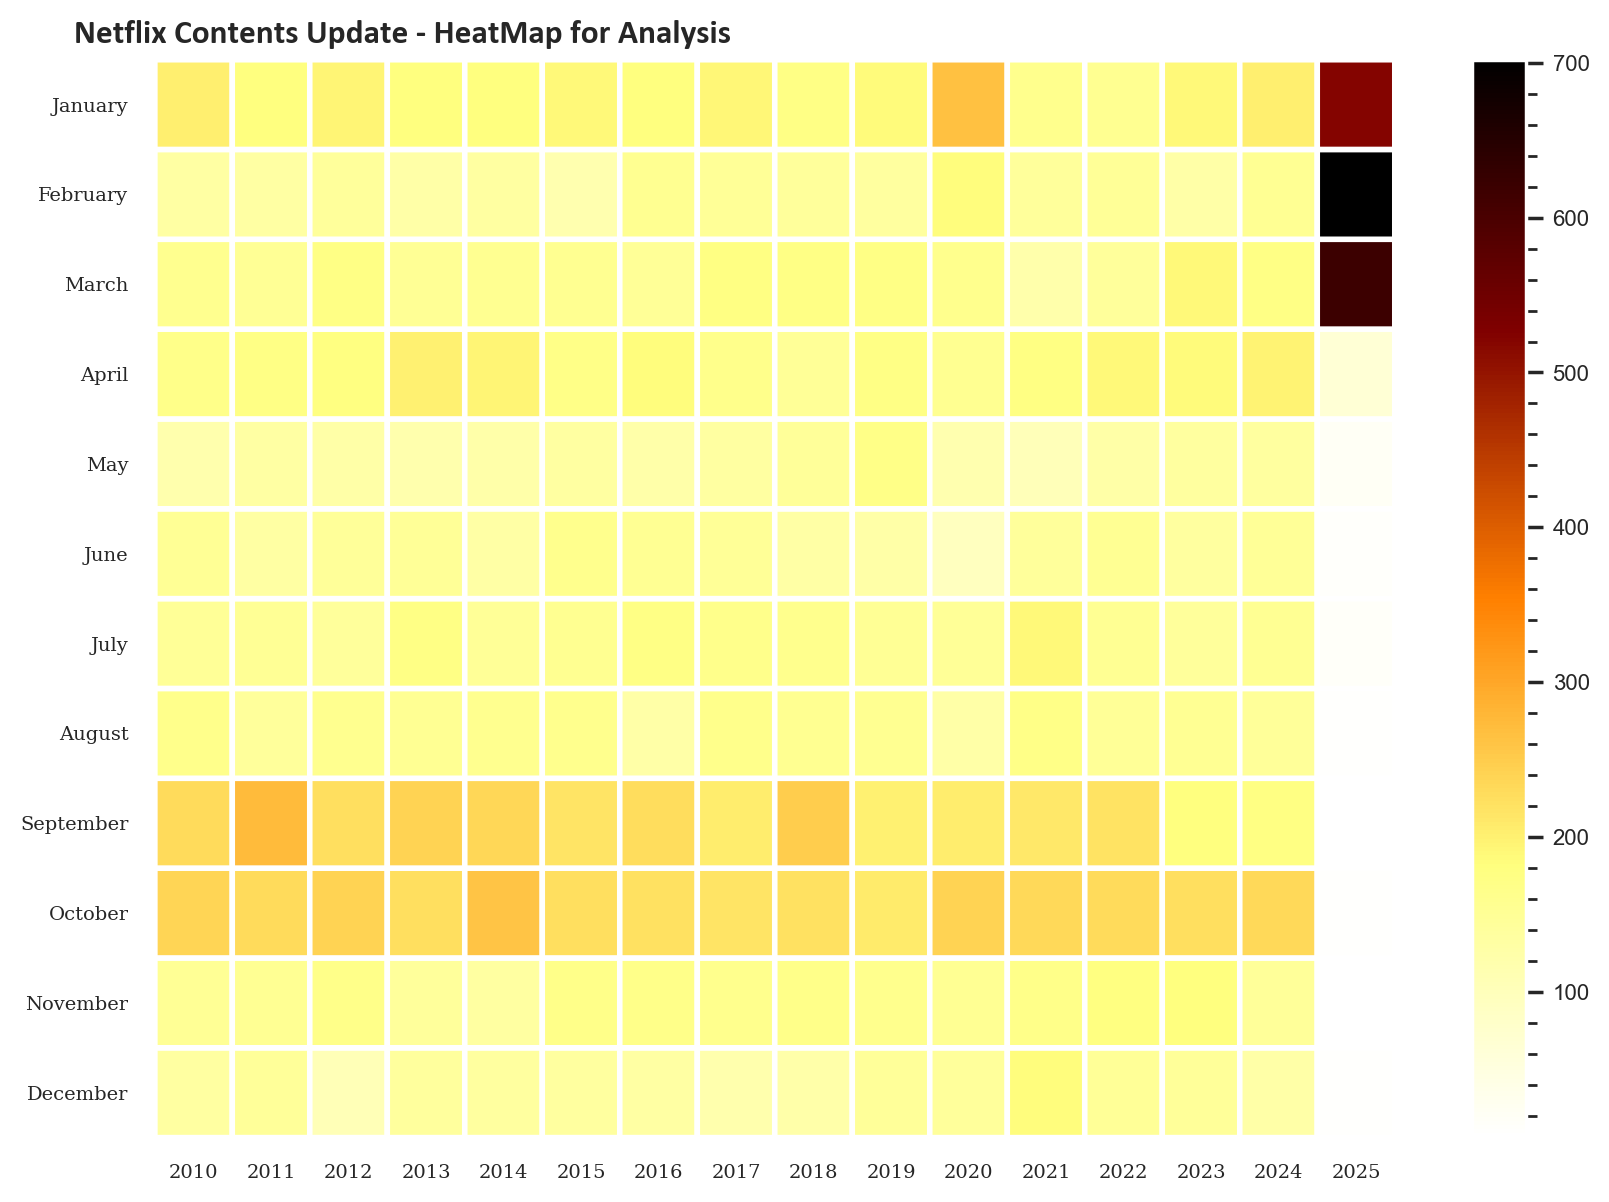

In [42]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update - HeatMap for Analysis', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Convertir a datetime, ignorar errores
netflix_date = netflix_dataset_2025[['date_added']].dropna()
netflix_date['date_added'] = pd.to_datetime(netflix_date['date_added'], errors='coerce')

# Filtrar fechas válidas
netflix_date = netflix_date.dropna()

# Extraer año y nombre del mes
netflix_date['year'] = netflix_date['date_added'].dt.year
netflix_date['month'] = netflix_date['date_added'].dt.month_name()

# Orden de meses (de diciembre a enero)
month_order = ['December', 'November', 'October', 'September', 'August', 'July',
               'June', 'May', 'April', 'March', 'February', 'January']

# Agrupar
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

# Graficar heatmap
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2)

plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update - HeatMap for Analysis',
          fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.02))

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()

plt.show()

If the year 2020 is considered, February and June were the months when comparatively less content was released. Therefore, these months may be a good choice for the success of a new release!

## **Movie Ratings Analysis**

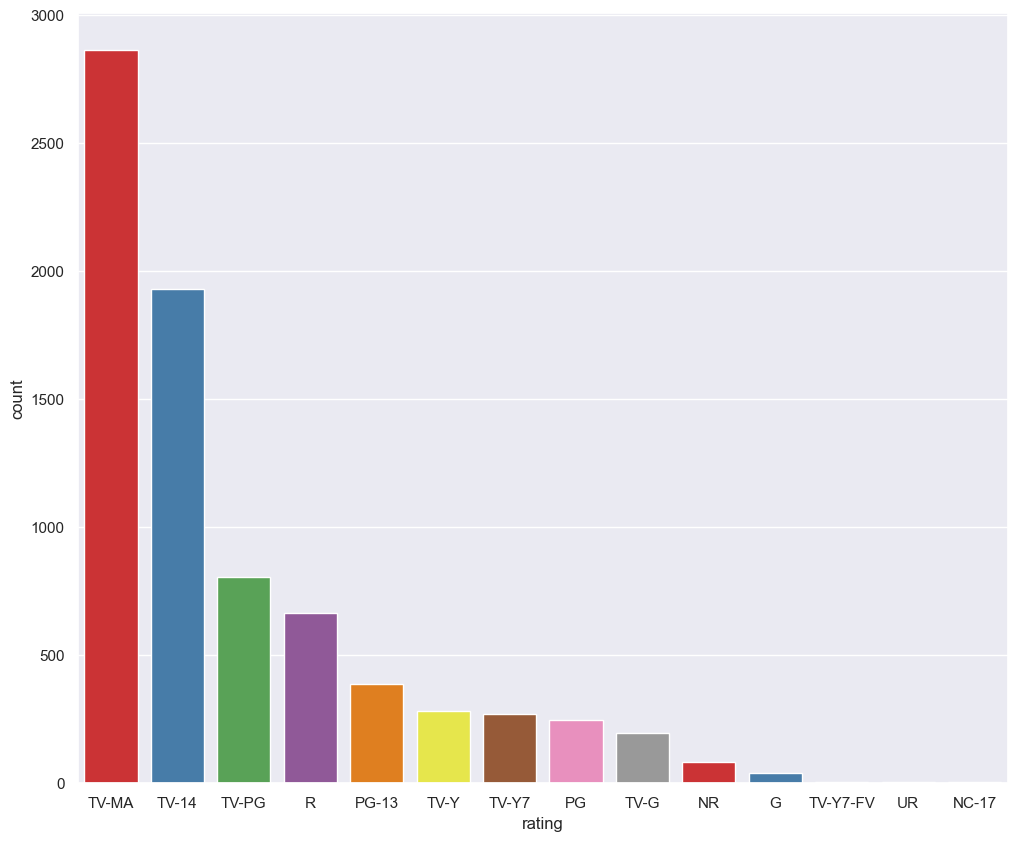

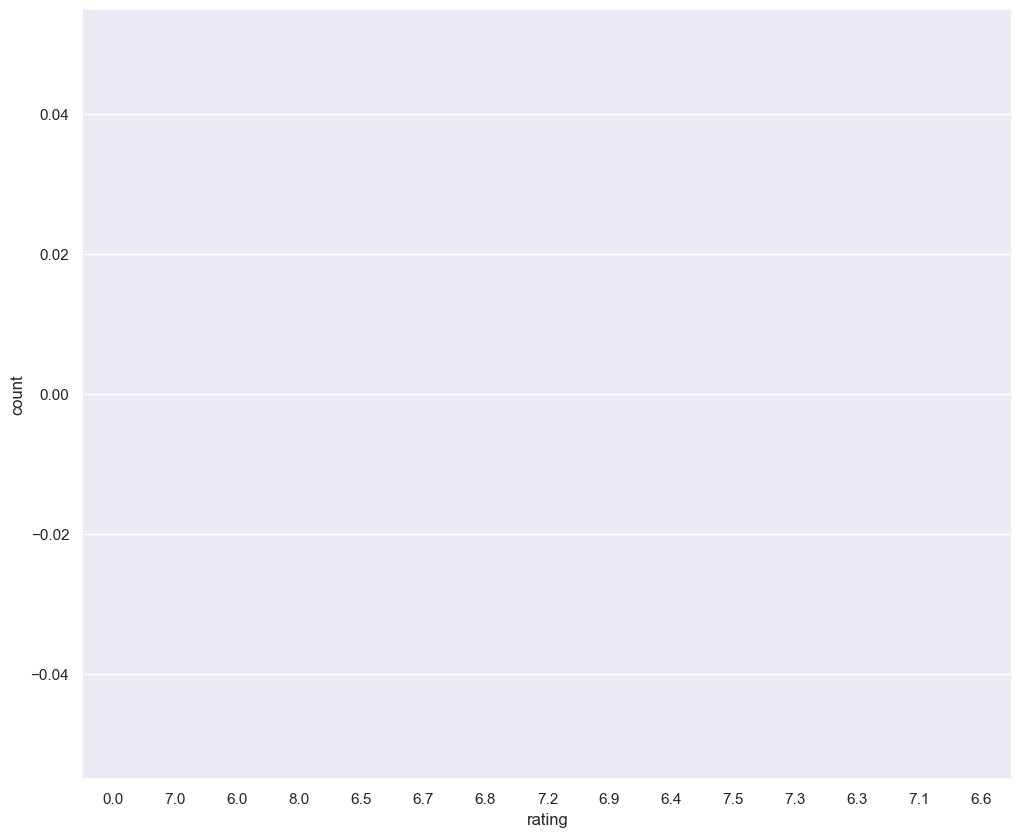

In [43]:
#Movie ratings analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_dataset, palette="Set1", order=netflix_dataset['rating'].value_counts().index[0:15])

#Movie ratings analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_dataset, palette="Set1", order=netflix_dataset_2025['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating. "TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the 'TV-PG' rating. Programs rated TV-PG may contain some material that parents or guardians may find inappropriate for younger children. Programs assigned a TV-PG rating may include infrequent coarse language, some sexual content, some suggestive dialogue, or moderate violence.

## **Analysing IMDB ratings to get top rated movies on Netflix**

In [44]:
imdb_ratings=pd.read_csv('IMDb_ratings.csv', usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(85852, 4)

Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB and are available on Netflix.

In [45]:
ratings.dropna()
joint_data=ratings.merge(netflix_dataset,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

ratings.dropna()
joint_data_2025=ratings.merge(netflix_dataset_2025,left_on='Title',right_on='title',how='inner')
joint_data_2025=joint_data.sort_values(by='Rating', ascending=False)

## **Top rated 10 movies in Netflix**

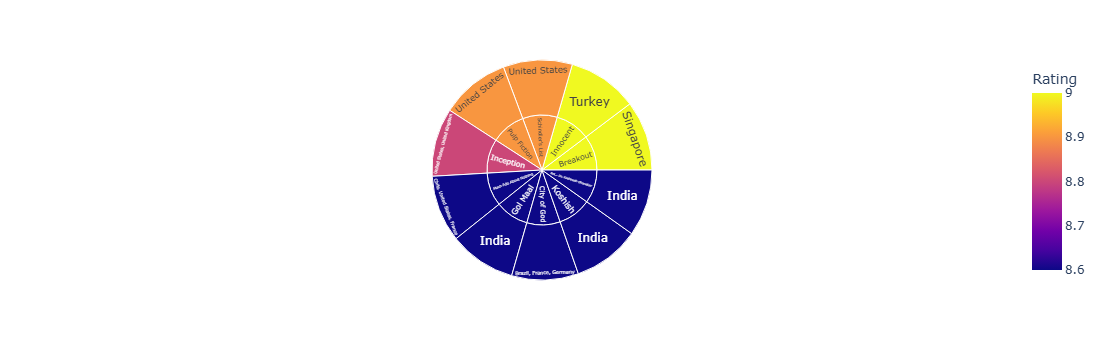

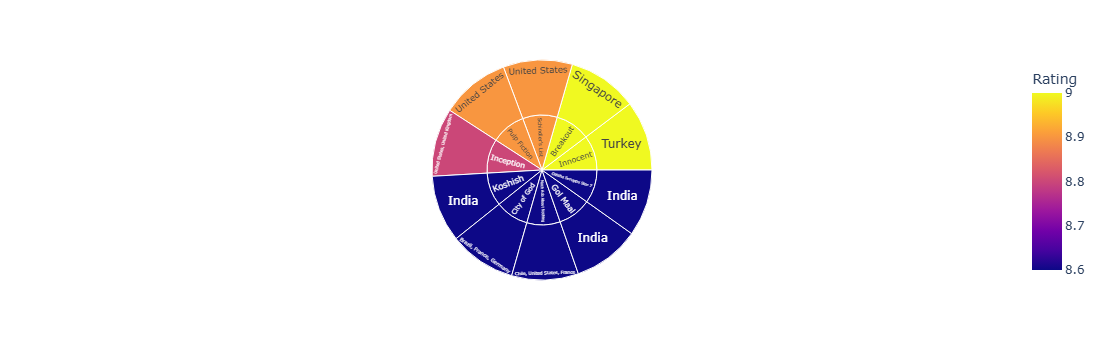

In [46]:
#Top rated 10 movies in Netflix are:
import plotly.express as px
top_rated=joint_data[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

#Top rated 10 movies in Netflix are:
import plotly.express as px
top_rated=joint_data_2025[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

## **Top countries creating contents**

In [47]:
#Top countries creating contents
# country_count=joint_data['country'].value_counts().sort_values(ascending=False)
# country_count=pd.DataFrame(country_count)
# topcountries=country_count[0:11]
# topcountries

country_count_25=joint_data_2025['country'].value_counts().sort_values(ascending=False)
country_count_25=pd.DataFrame(country_count_25)
topcountries_25=country_count_25[0:11]
topcountries_25

,count
country,
United States,799
India,702
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33


## **Year wise analysis**

In [48]:
Last_fifteen_years = netflix_dataset[netflix_dataset['release_year']>2005 ]
Last_fifteen_years.head()

# Last_fifteen_years_25 = netflix_dataset_2025[netflix_dataset_2025['release_year']>2005 ]
# Last_fifteen_years_25.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


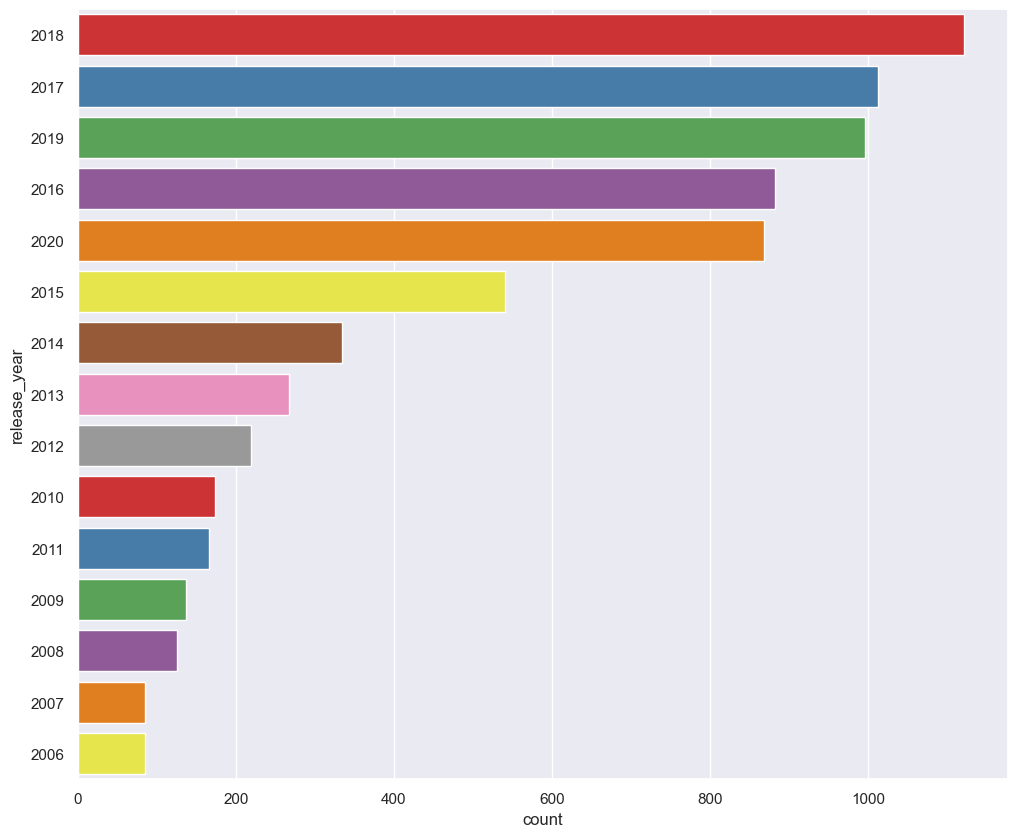

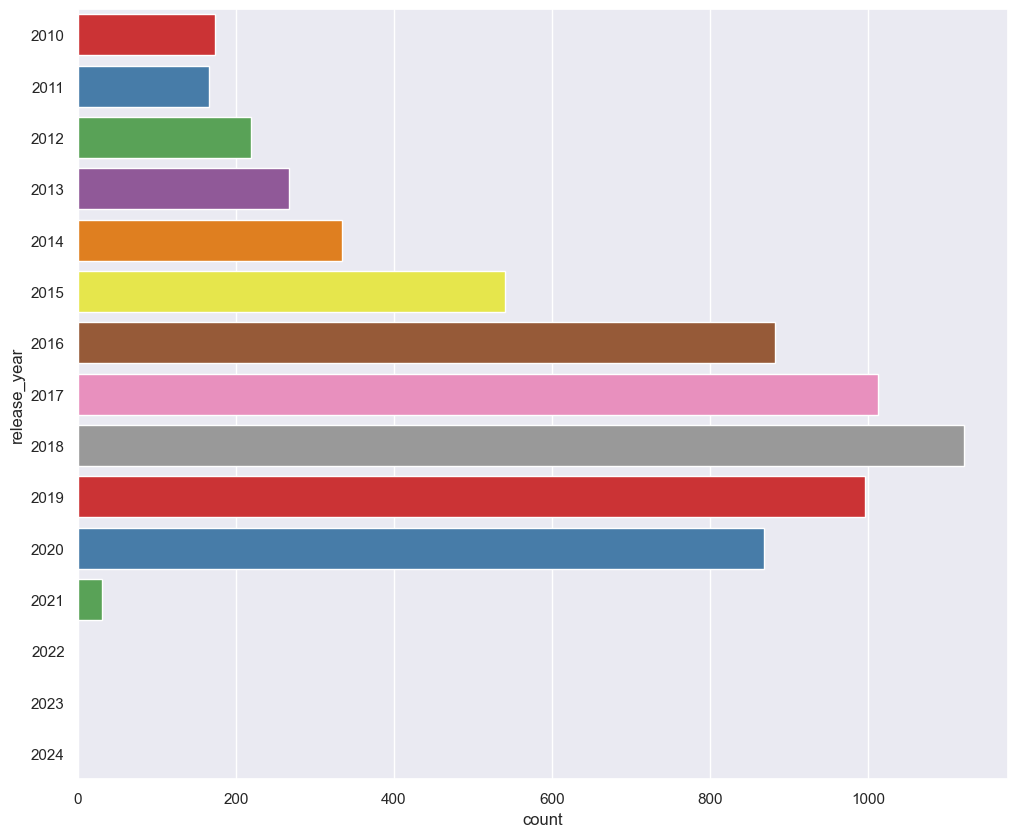

In [51]:
#Year wise analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set1", order=netflix_dataset['release_year'].value_counts().index[0:15])

plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=Last_fifteen_years, palette="Set1", order=netflix_dataset_2025['release_year'].value_counts().index[0:15])

Thus, 2018 was the year when most of the content were released.

## **Analysis of TV Shows in Netflix** 

In [52]:
#Analysis of TV Shows in Netflix

countries={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou=list(netflix_shows['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

countries_25={}
netflix_shows_25['country']=netflix_shows_25['country'].fillna('Unknown')
cou=list(netflix_shows_25['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries_25.keys()):
            countries_25[i]+=1
        else:
            countries_25[i[0]]=1
    else:
        for j in i:
            if j in list(countries_25.keys()):
                countries_25[j]+=1
            else:
                countries_25[j]=1

In [53]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

countries_fin_25={}
for country,no in countries_25.items():
    country=country.replace(' ','')
    if country in list(countries_fin_25.keys()):
        countries_fin_25[country]+=no
    else:
        countries_fin_25[country]=no
        
countries_fin_25={k: v for k, v in sorted(countries_fin_25.items(), key=lambda item: item[1], reverse= True)}

[Text(0, 0, 'UnitedStatesofAmerica'),
 Text(1, 0, 'UnitedKingdom'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Canada'),
 Text(4, 0, 'Germany'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'SouthKorea'),
 Text(7, 0, 'Ireland'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'Italy')]

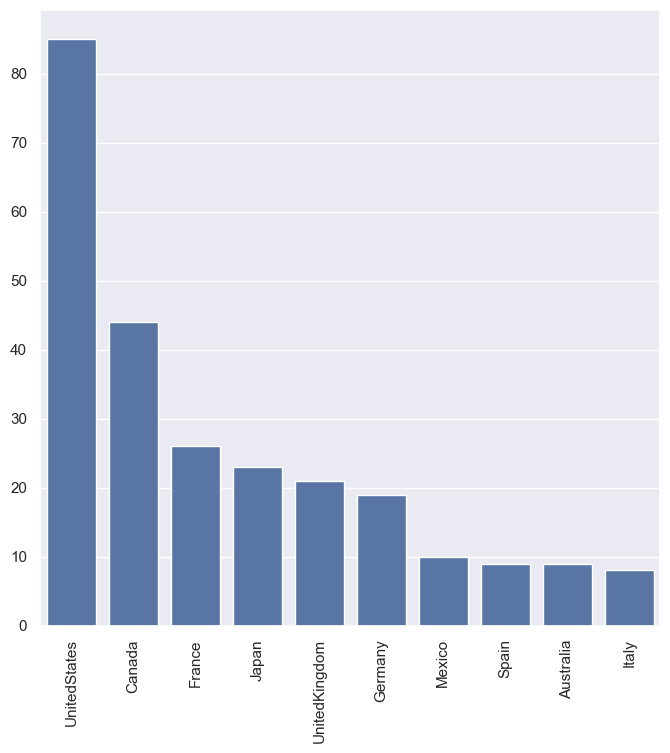

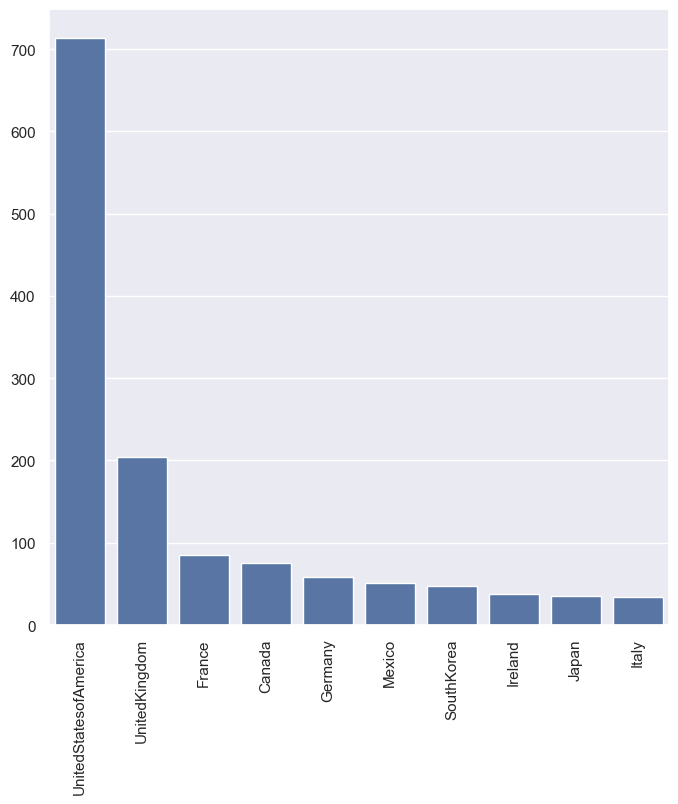

In [54]:
# Top 10 TV shows creating countries.

plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin_25.keys())[0:10],y=list(countries_fin_25.values())[0:10])
ax.set_xticklabels(list(countries_fin_25.keys())[0:10],rotation = 90)

United States has the most TV Shows contents that were created in netflix.

## **Analysis of duration of movies** 

In [55]:
#Analysis of duration of movies

netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

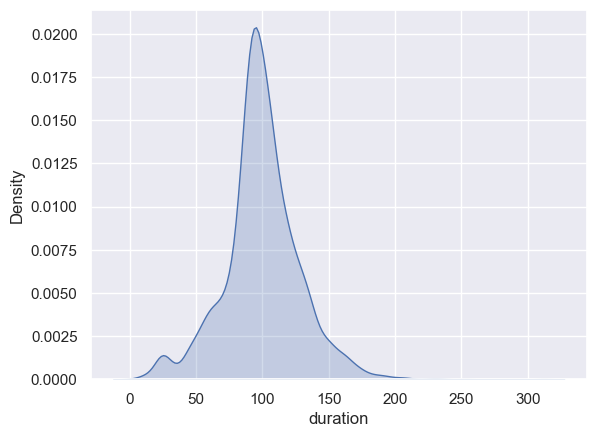

In [56]:
sns.set(style="darkgrid")
ax=sns.kdeplot(data=netflix_movies['duration'], shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting.

## **Analysis of duration of TV shows**

In [57]:
#Analysis of duration of TV shows

features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

features_25=['title','duration']
durations_25= netflix_shows_25[features]

durations_25['no_of_seasons']=durations_25['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations_25['no_of_seasons']=durations_25['no_of_seasons'].str.replace('s','')

In [58]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

durations_25['no_of_seasons']=durations_25['no_of_seasons'].astype(str).astype(int)

In [59]:
#TV shows with largest number of seasons
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

t25=['title','no_of_seasons']
top_25=durations_25[t25]

top_25=top_25.sort_values(by='no_of_seasons', ascending=False)

<Axes: xlabel='title'>

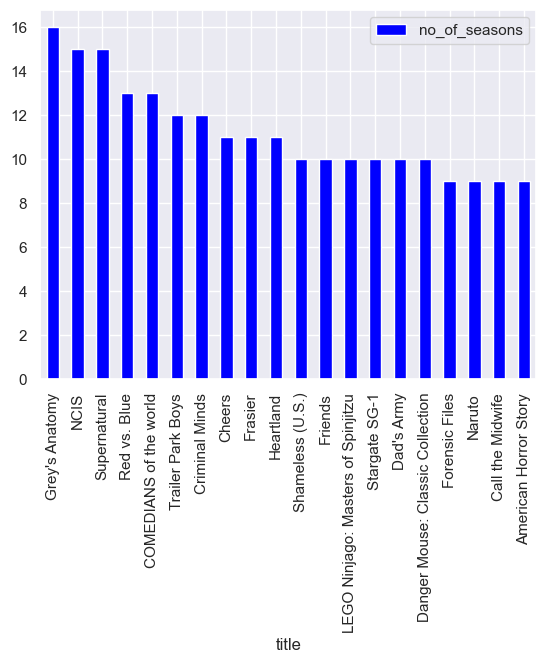

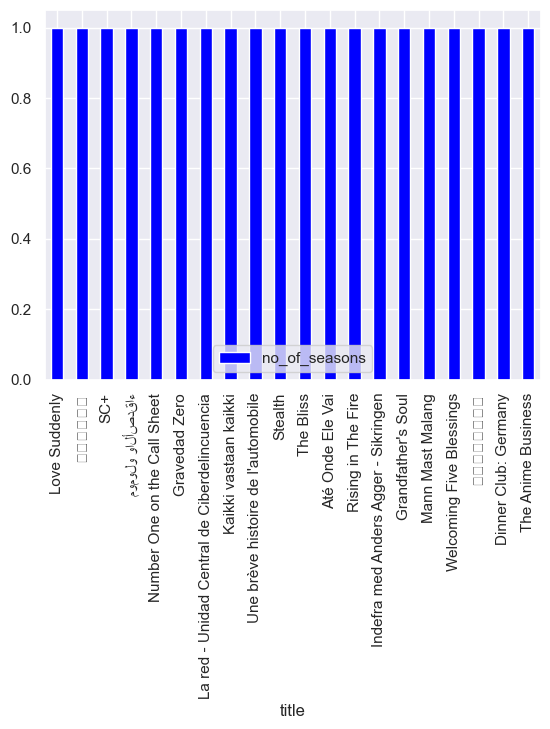

In [60]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')

top20=top_25[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='blue')

Thus, Grey's Anatomy, NCIS and Supernatural are amongst the tv series that have highest number of seasons.

# **Content-Based Recommendation System** 

## **Plot description based Recommender (Content Based Recommendations)**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **description feature** of our dataset. Let's take a look at the data...

In [61]:
#Plot description based Recommender (Content Based Recommendations)

netflix_dataset['description'].head()

# netflix_dataset_2025['description'].head()

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
Name: description, dtype: object

For any of you who has done even a bit of text processing before knows we need to convert the word vector of each description.
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each description.

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Now if you are wondering what is **Term Frequency (TF)**, it is the relative frequency of a word in a document and is given as (term instances/total instances). **Inverse Document Frequency (IDF)** is the relative count of documents containing the term is given as log(number of documents/documents with term) The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the description vocabulary (all the words that appear in at least one document) and each row represents a movie, as before. This is done to reduce the importance of words that occur frequently in plot descriptions and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines.

In [ ]:
#Recommedation System(Content Based)

#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words='english')
netflix_dataset['description'] = netflix_dataset['description'].fillna('')
tfidf_matrix = tfidf.fit_transform(netflix_dataset['description'])
tfidf_matrix.shape


# Cargar datos y crear TF-IDF (ya es disperso por defecto)
tfidf_25 = TfidfVectorizer(stop_words='english')
netflix_dataset_2025['description'] = netflix_dataset_2025['description'].fillna('NaN')
tfidf_matrix_25 = tfidf_25.fit_transform(netflix_dataset_2025['description'])

# Verificar el tipo de matriz (debe ser CSR o similar)
print(type(tfidf_matrix_25))  # Debería ser <class 'scipy.sparse.csr_matrix'>


# Convertir a float32 para ahorrar memoria (opcional)
tfidf_matrix_25 = tfidf_matrix_25.astype(np.float32)
tfidf_matrix_25.shape

<class 'scipy.sparse._csr.csr_matrix'>


(32000, 54565)

In [63]:
f5 = tfidf_matrix[:5]
l5 = tfidf_matrix[-5:]
f5_dense = f5.toarray()
l5_dense = l5.toarray()
feature_names = tfidf.get_feature_names_out()
df_f5 = pd.DataFrame(f5_dense, columns=feature_names)
df_l5 = pd.DataFrame(l5_dense, columns=feature_names)
display(df_f5)
display(df_l5)

,000,007,009,10,100,1000,102,10th,11,112,...,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,ōarai,şeref
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,000,007,009,10,100,1000,102,10th,11,112,...,zé,álex,álvaro,ángel,émile,ömer,über,łukasz,ōarai,şeref
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.208147,0.0,0.0,0.0,0.235683,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We see that over 17,900 different words were used to describe the 7787 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:

**similarity = cos(x, y) = x . y / ||x|| * ||y||**

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. 

Therefore, we will use **sklearn's linear_kernel()** instead of cosine_similarities() since it is faster..

In [67]:
import numpy as np
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from scipy.sparse import csr_matrix

# Asegúrate de que tfidf_matrix_25 exista y tenga forma (n_items, n_features)
n_items = tfidf_matrix_25.shape[0]

# Inicializa una matriz densa o sparse
# Dense:
cosine_sim_25 = np.zeros((n_items, n_items), dtype=np.float32)
# —o si realmente quieres usar sparse:
# cosine_sim_25 = csr_matrix((n_items, n_items), dtype=np.float32)

# Rellena fila por fila
for i in range(n_items):
    # calcula similitud de la i-ésima con todas
    sim_row = cosine_similarity(tfidf_matrix_25[i], tfidf_matrix_25).flatten()
    cosine_sim_25[i, :] = sim_row  # si es densa
    # si es sparse: cosine_sim_25[i] = sim_row

# Ya tienes cosine_sim_25 listo


We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices. In other words, we need a mechanism to identify the index of a movie in our netflix DataFrame, given its title.

In [68]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(netflix_dataset.index, index=netflix_dataset['title']).drop_duplicates()

indices_25 = pd.Series(netflix_dataset_2025.index, index=netflix_dataset_2025['title']).drop_duplicates()

**We are now in a good position to define our recommendation function. These are the following steps we'll follow :-**

1. Get the index of the movie given its title.
2. Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
3. Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
4. Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
5. Return the titles corresponding to the indices of the top elements.

In [153]:
# 0. IMPORTS
# Celda 1: Imports y parámetros
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from difflib import get_close_matches

YEAR_THRESHOLD  = 2009  # el año que exista en tu CSV

# Celda 2: Carga y filtro
df1 = pd.read_csv('netflix_tv_shows_detailed_up_to_2025.csv')
df2 = pd.read_csv('netflix_movies_detailed_up_to_2025.csv')
df1['type'] = 'TV Show'; df2['type'] = 'Movie'
netflix_df = pd.concat([df1, df2], ignore_index=True)

netflix_df = (
    netflix_df[ netflix_df['release_year'] > YEAR_THRESHOLD ]
    .reset_index(drop=True)
)
# Celda 3: Preparar texto y evitar vacíos
netflix_df['description'] = netflix_df['description'].fillna('')
netflix_df['text_for_vec'] = (
    netflix_df['title'].fillna('') + ' ' +
    netflix_df['description']
)

# Celda 4: Vectorizar y similitud
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(netflix_df['text_for_vec'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Celda 5: Mapping título → índice (normalizado)
indices = pd.Series(
    netflix_df.index,
    index=netflix_df['title'].str.strip().str.lower()
).to_dict()

# Celda 6: Función de recomendación
def get_recommendations(title, cosine_sim=cosine_sim):
    key = title.strip().lower()
    if key not in indices:
        sugerencias = get_close_matches(key, indices.keys(), n=5, cutoff=0.6)
        print(f"❌ '{title}' no encontrado. Quizás quisiste: {sugerencias}")
        return []
    idx = indices[key]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    movie_indices = [i for i, _ in sim_scores]
    return netflix_df['title'].iloc[movie_indices].tolist()

# Ejemplo:
# print(get_recommendations("Inception"))


In [154]:
get_recommendations('Yellowstone')

['1883',
 'Yellowstone: One-Fifty',
 '1923',
 'Super Eruption',
 'The Property',
 'Family',
 'Family on the Go 2',
 'Family on the Go 3',
 'Family',
 'Crash Course US History']

In [155]:
get_recommendations('3%')

['Another Chance',
 'Paradise Descendants',
 'Natural High',
 "Single's Inferno",
 'The Island',
 'Birds of Paradise',
 'Rogue Warfare',
 'Paradise',
 'The Crowded Room',
 'Island Nation']

In [156]:
get_recommendations('Minority Report')

['The Haunted House',
 'Living Memories',
 'Crimes',
 'Sell Your Haunted House',
 'Seeking My Own Future',
 'The Cop',
 'The Last Cop',
 'The Visitor from the Future',
 'Muppets Haunted Mansion',
 'The Sense of an Ending']

In [157]:
get_recommendations('Toy Story 3')

['Toy Story 4',
 'Toy Guardians',
 'Invincible Fight Girl',
 'Jim & Andy: The Great Beyond',
 'Dead Money',
 'Uncle',
 'Coffee Prince',
 'Rent-A-Pal',
 'Group Sex',
 'Demonic Toys: Personal Demons']

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "Welcome" returns movies with similar description while it is more likely that the people who liked that movie are more inclined to enjoy other Akshay Kumar movies. This is something that cannot be captured by the present system.

Therefore, more metrics are added to the model to improve performance.

### Content based filtering on multiple metrics

Content based filtering on the following factors:

* Title
* Cast
* Director
* Listed in
* Plot

In [132]:
#Filling null values with empty string.
filledna=netflix_dataset.fillna('')
filledna.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same

In [133]:
#Cleaning the data - making all the words lower case
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [134]:
#Identifying features on which the model is to be filtered.
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [135]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head()

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,07:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."
2,23:59,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","horrormovies,internationalmovies","whenanarmyrecruitisfounddead,hisfellowsoldiers..."
3,9,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","action&adventure,independentmovies,sci-fi&fantasy","inapostapocalypticworld,rag-dollrobotshideinfe..."
4,21,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",dramas,abrilliantgroupofstudentsbecomecard-countingex...


We are now in a position to create our "soup" or a "bag of words" for all rows, which is a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).


In [136]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

filledna['soup'] = filledna.apply(create_soup, axis=1)

The next steps are the same as what we did with our plot description based recommender. 

One important difference is that we use the CountVectorizer() instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [137]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

In [138]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [139]:
# Reset index of our main DataFrame and construct reverse mapping as before
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [140]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_dataset['title'].iloc[movie_indices]

In [142]:
get_recommendations_new('3%')

38                     แผนร้ายนายเจ้าเล่ห์
215                          A Perfect Man
11                                    1983
893                                 Bhouri
486     An American Tail: Fievel Goes West
1001                             Blue Ruin
64      13 Reasons Why: Beyond the Reasons
819            Being Mary Jane: The Series
644                                  Ayana
438              Altered Carbon: Resleeved
Name: title, dtype: object

In [98]:
get_recommendations_new('Avengers: Infinity War', cosine_sim2)

7058                               Thor: Ragnarok
5698                      Solo: A Star Wars Story
2700                                          Her
5118                                   Real Steel
5699    Solo: A Star Wars Story (Spanish Version)
959                                 Black Panther
3006                                     Inkheart
5632                                  Singularity
1741                   Di Renjie zhi Sidatianwang
2586                      Halo: The Fall of Reach
Name: title, dtype: object

In [99]:
get_recommendations_new('Dil Dhadakne Do', cosine_sim2)

7769    Zindagi Na Milegi Dobara
362                     AK vs AK
6878             The Sky Is Pink
1757              Dil Chahta Hai
3912                        Mann
4872                          PK
2571                      Haapus
886               Bhangra Paa Le
5954            Taare Zameen Par
1261             Chal Dhar Pakad
Name: title, dtype: object

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvel or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add production_company . We can also increase the weight of the director, by adding the feature multiple times in the soup.